# 1. Defining the Project

We are going to use the famous Boston Housing dataset, which is available online but can be also loaded from the scikit-learn library, to predict housing prices using the 13 features (e.g., crime rate, area population, number of rooms per dwelling) and 506 samples available in the dataset.

# 2. Preparing the Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
from sklearn.datasets import load_boston
boston_housing = load_boston()
print(boston_housing.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston_housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Creating dataframe with features
boston_df = pd.DataFrame(boston_housing.data, columns = boston_housing.feature_names)

#Adding target variable to the dataset
boston_df['MEDV'] = boston_housing.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. Exploring and Visualizing the Data

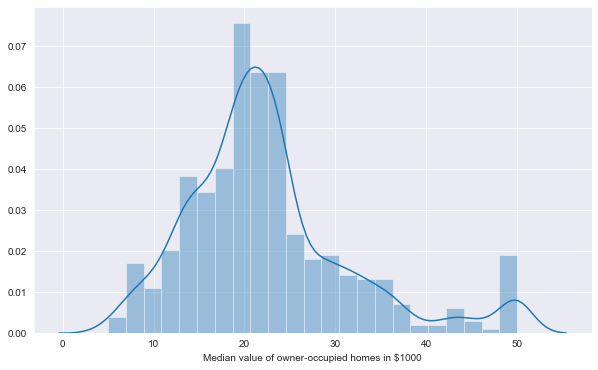

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,6))

# Distribution of the target variable
sns.distplot(boston_df['MEDV'], axlabel = 'Median value of owner-occupied homes in $1000')

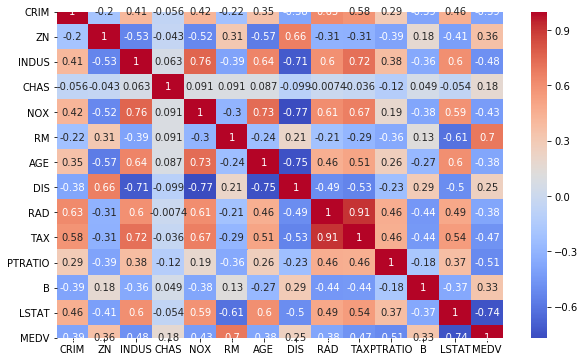

In [13]:
# Correlation Matrix
boston_corr = boston_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(boston_corr, annot = True, cmap = 'coolwarm')

<Figure size 720x432 with 0 Axes>

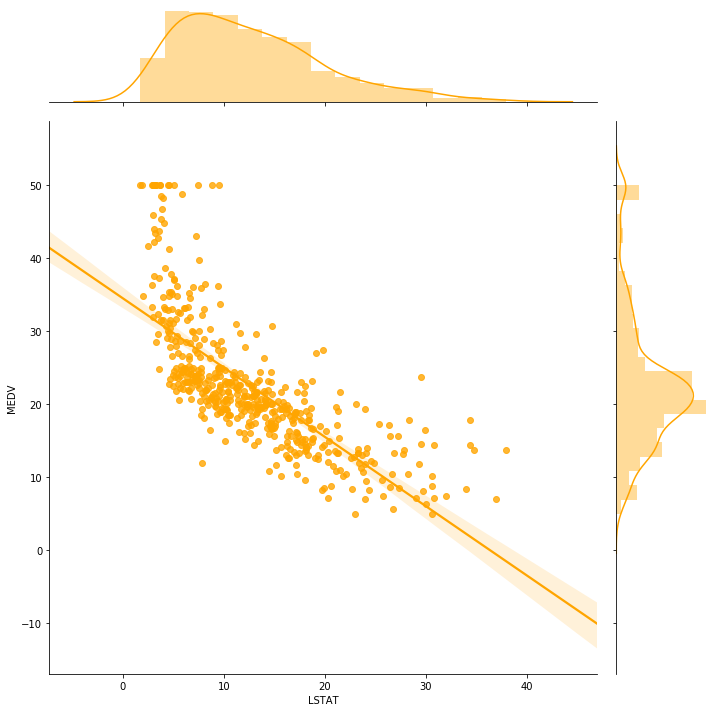

In [15]:
# Jointplots for high correlations - lower status population
plt.figure(figsize = (10,6))
sns.jointplot(x = 'LSTAT', y = 'MEDV', data = boston_df, kind = 'reg', height = 10, color = 'orange')

<Figure size 720x720 with 0 Axes>

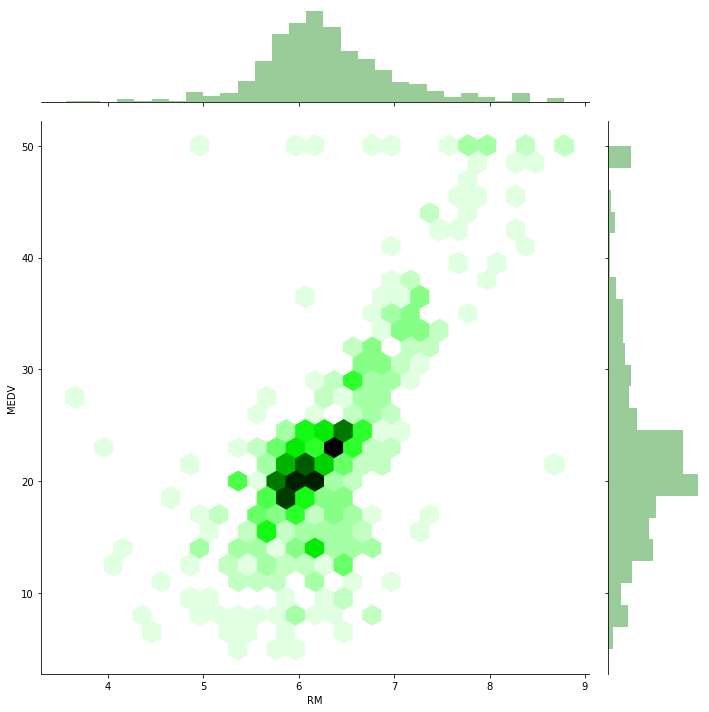

In [16]:
# Jointplots for high correlation - number of rooms
plt.figure(figsize = (10,10))
sns.jointplot(x = 'RM', y = 'MEDV', data = boston_df, kind = 'hex', color = 'green', height = 10)

# 4. Creating a Machine Learning Model

In [19]:
# Preparing the dataset
X = boston_df.drop(['MEDV'], axis = 1)
Y = boston_df['MEDV']

In [20]:
# Splitting into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100 )

In [21]:
# Training the linear Regression Model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Evaluating the Linear Regression Model for the test set
from sklearn.metrics import mean_squared_error, r2_score
predictions = lm.predict(X_test)
RMSE_lm = np.sqrt(mean_squared_error(Y_test, predictions))
r2_lm = r2_score(Y_test, predictions)

print('RMSE_lm = {}'.format(RMSE_lm))
print('r2_lm = {}'.format(r2_lm))

RMSE_lm = 5.212786603443838
r2_lm = 0.7246154314616744


In [23]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators  = 10, random_state = 100)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [24]:
# Evaluating the Random Forest model for the test set
predictions_rf = rf.predict(X_test)
RMSE_rf = np.sqrt(mean_squared_error(Y_test, predictions_rf))
r2_rf = r2_score(Y_test, predictions_rf)

print('RMSE_rf = {}'.format(RMSE_rf))
print('R2_rf = {}'.format(r2_rf))

RMSE_rf = 3.4746076649309416
R2_rf = 0.877647948921272


In [37]:
Y_pred = rf.predict(X_test)

In [39]:
#from sklearn.metrics import r2_score
#train_score = round(rf.score(X_train, Y_train)*100, 2)
#test_score = round(rf.score(X_test, Y_pred)*100, 2)

#print('----------Model Performance--------')
#print("Train_accuracy :" + str(train_score))
#print("Test_accuracy :" + str(test_score))

# 5. Presenting Your Findings

That’s it! Now it’s time to share your project with the world.

If you were using Jupyter Notebook as your Python IDE, you can share the notebook directly, but preferably save it as a PDF file so it’s more accessible. Another option is to share your Python projects via GitHub.